
# Retail Store Inventory Analysis

**Objective:**  
Explore the retail store dataset to understand how past sales and promotions may influence next week’s product demand.

**Hypotheses:**  
- **Null Hypothesis (H₀):** Past sales and promotions do not significantly predict next week’s product demand.  
- **Alternative Hypothesis (Hₐ):** Past sales and promotions significantly predict next week’s product demand.


In [ ]:

# Install required packages
%pip install pandas numpy matplotlib seaborn scikit-learn





Note: you may need to restart the kernel to use updated packages.


In [4]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set(style="whitegrid")

In [5]:
# Load dataset
df = pd.read_csv("data/retail_store_inventory.csv")
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [6]:
df.shape

(73100, 15)

## Dataset Overview

In [7]:
# Display info and check for missing values
df.info()
df.describe(include="all").T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,73100,731,2022-01-01,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store ID,73100,5,S001,14620,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product ID,73100,20,P0001,3655,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,73100,5,Furniture,14699,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,73100,4,East,18349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Inventory Level,73100.0,NaN,NaN,NaN,274.469877,129.949514,50.0,162.0,273.0,387.0,500.0
Units Sold,73100.0,NaN,NaN,NaN,136.46487,108.919406,0.0,49.0,107.0,203.0,499.0
Units Ordered,73100.0,NaN,NaN,NaN,110.004473,52.277448,20.0,65.0,110.0,155.0,200.0
Demand Forecast,73100.0,NaN,NaN,NaN,141.49472,109.254076,-9.99,53.67,113.015,208.0525,518.55
Price,73100.0,NaN,NaN,NaN,55.135108,26.021945,10.0,32.65,55.05,77.86,100.0


### Missing Values Check

In [8]:
df.isnull().sum()

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

## Univariate Analysis

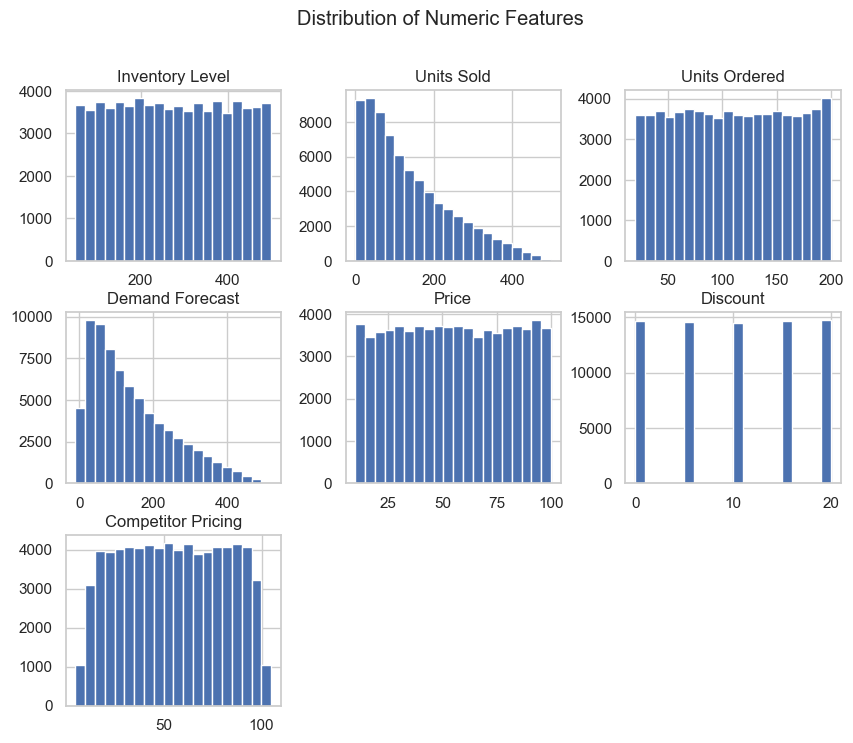

In [9]:
numeric_cols = [
    "Inventory Level",
    "Units Sold",
    "Units Ordered",
    "Demand Forecast",
    "Price",
    "Discount",
    "Competitor Pricing",
]
df[numeric_cols].hist(figsize=(10, 8), bins=20)
plt.suptitle("Distribution of Numeric Features")
plt.show()

## Categorical Variables Overview

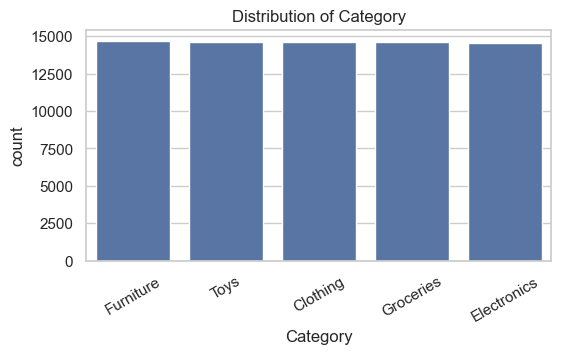

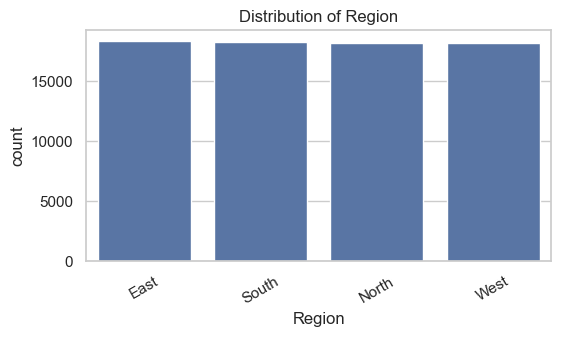

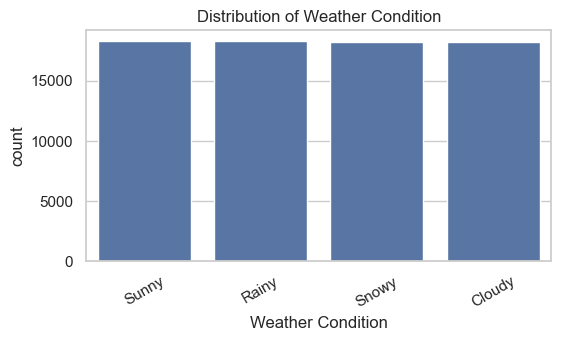

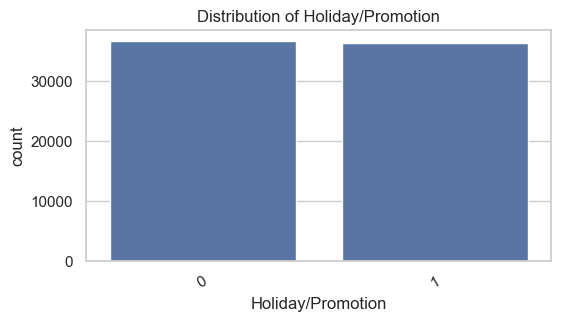

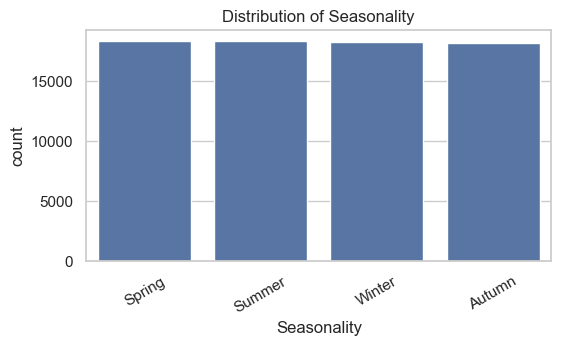

In [10]:
cat_cols = [
    "Category",
    "Region",
    "Weather Condition",
    "Holiday/Promotion",
    "Seasonality",
]
for col in cat_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=30)
    plt.show()

## Correlation Analysis

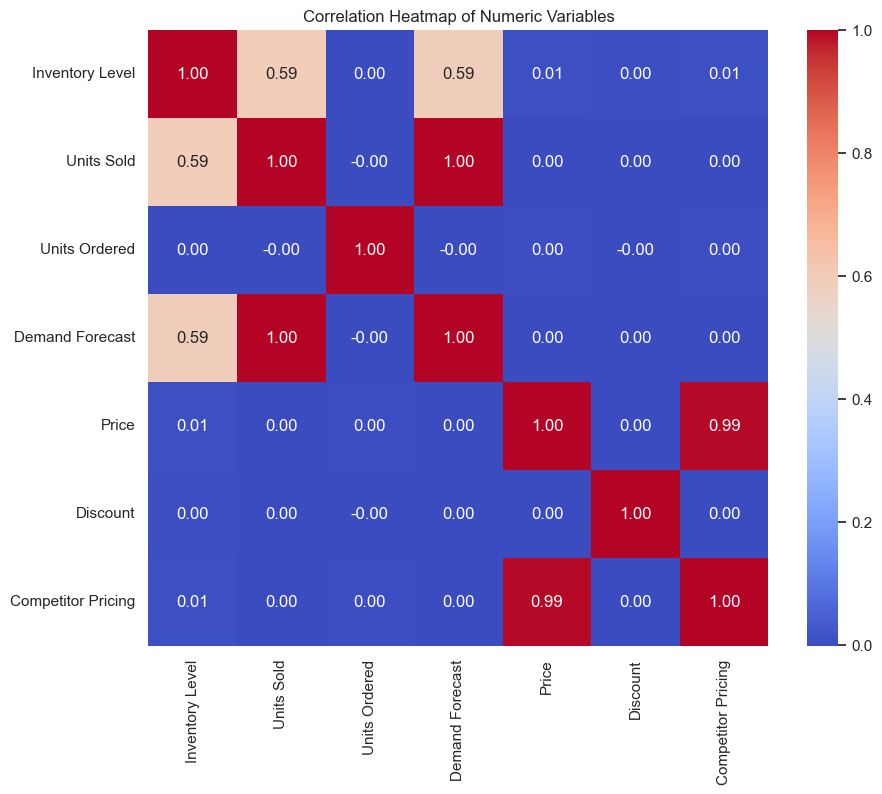

In [11]:
plt.figure(figsize=(10, 8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()

## Relationship Between Sales and Demand

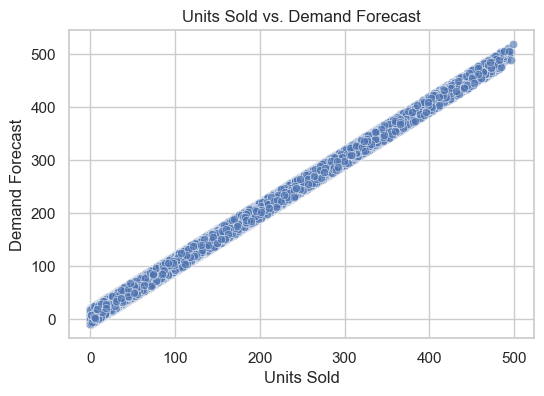

In [12]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x="Units Sold", y="Demand Forecast", data=df, alpha=0.6)
plt.title("Units Sold vs. Demand Forecast")
plt.show()

## Impact of Promotions on Demand

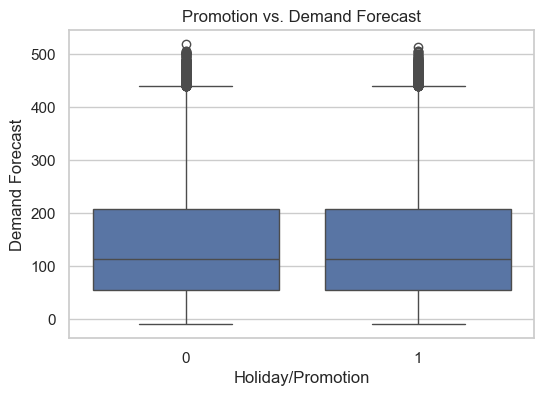

In [13]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="Holiday/Promotion", y="Demand Forecast", data=df)
plt.title("Promotion vs. Demand Forecast")
plt.show()


## Initial Insights

- The dataset appears complete, with no missing values.
- Numeric variables show varying distributions, with sales and demand metrics being right-skewed.
- Correlation analysis may reveal a positive link between *Units Sold* and *Demand Forecast*.
- Promotions could increase demand during specific periods.
- These findings support testing the hypothesis that past sales and promotions influence future demand.


In [14]:
# Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Sort by date
df = df.sort_values("Date")

In [15]:
# Aggregate average sales and demand by date
daily_trends = (
    df.groupby("Date")[["Units Sold", "Demand Forecast", "Holiday/Promotion"]]
    .mean()
    .reset_index()
)
# filter daily_trends by 'Toys' category
toys_trends = (
    df[df["Category"] == "Toys"]
    .groupby("Date")[["Units Sold", "Demand Forecast", "Holiday/Promotion"]]
    .mean()
    .reset_index()
)
daily_trends

,Date,Units Sold,Demand Forecast,Holiday/Promotion
0,2022-01-01,144.84,150.3126,0.52
1,2022-01-02,134.15,139.1072,0.46
2,2022-01-03,136.81,141.8527,0.46
3,2022-01-04,140.84,146.0910,0.53
4,2022-01-05,125.72,130.9170,0.45
...,...,...,...,...
726,2023-12-28,162.71,166.1485,0.44
727,2023-12-29,133.68,139.2618,0.54
728,2023-12-30,131.56,135.0666,0.39
729,2023-12-31,112.08,116.2226,0.56


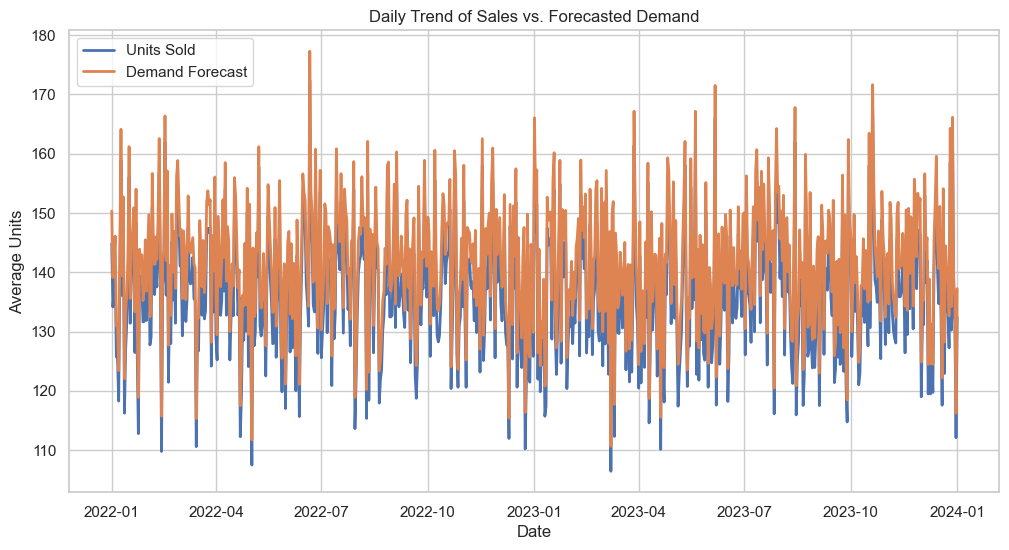

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(
    daily_trends["Date"], daily_trends["Units Sold"], label="Units Sold", linewidth=2
)
plt.plot(
    daily_trends["Date"],
    daily_trends["Demand Forecast"],
    label="Demand Forecast",
    linewidth=2,
)
plt.title("Daily Trend of Sales vs. Forecasted Demand")
plt.xlabel("Date")
plt.ylabel("Average Units")
plt.legend()
plt.show()

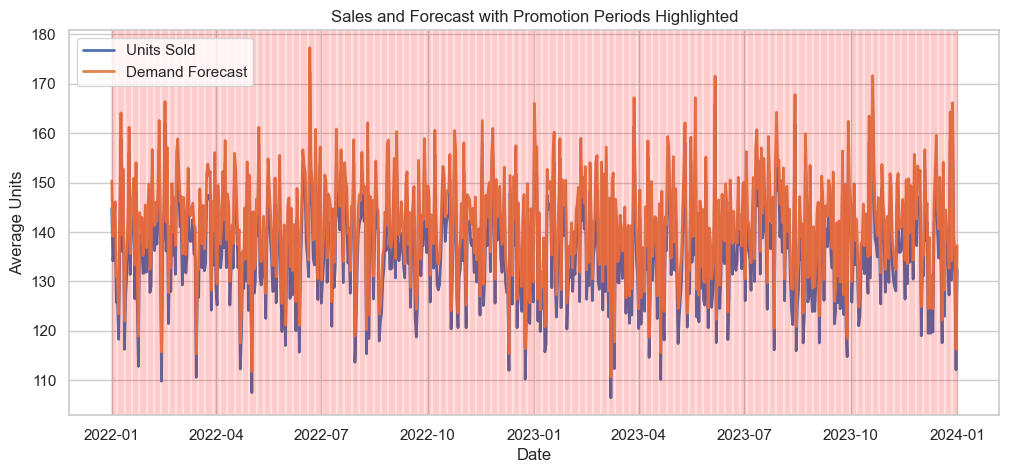

In [17]:
plt.figure(figsize=(12, 5))
sns.lineplot(
    data=daily_trends, x="Date", y="Units Sold", label="Units Sold", linewidth=2
)
sns.lineplot(
    data=daily_trends,
    x="Date",
    y="Demand Forecast",
    label="Demand Forecast",
    linewidth=2,
)
promotion_dates = daily_trends[daily_trends["Holiday/Promotion"] > 0]["Date"]
for date in promotion_dates:
    plt.axvline(date, color="red", alpha=0.1)  # faint red lines for promotions
plt.title("Sales and Forecast with Promotion Periods Highlighted")
plt.xlabel("Date")
plt.ylabel("Average Units")
plt.legend()
plt.show()

## Moving Average

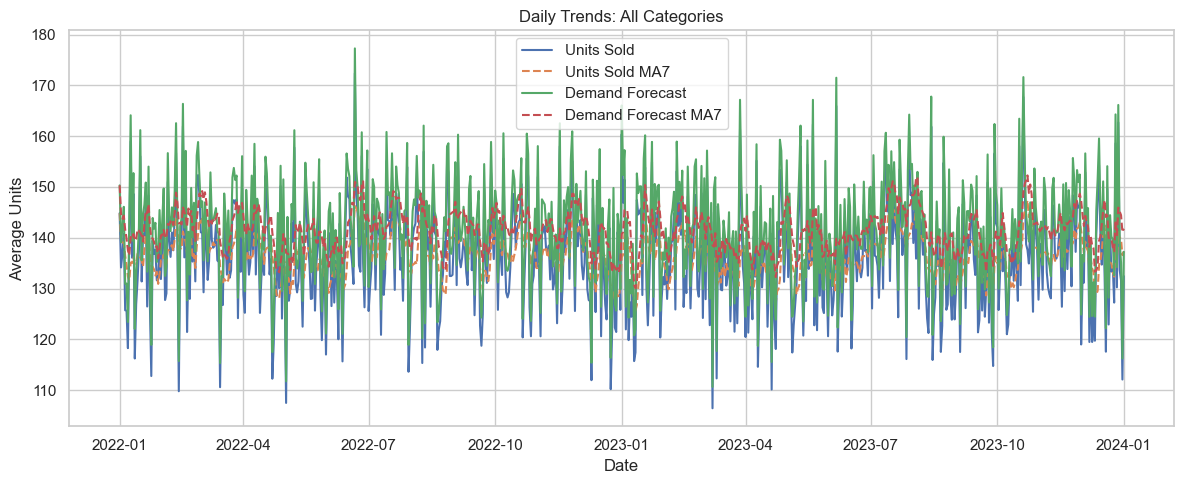

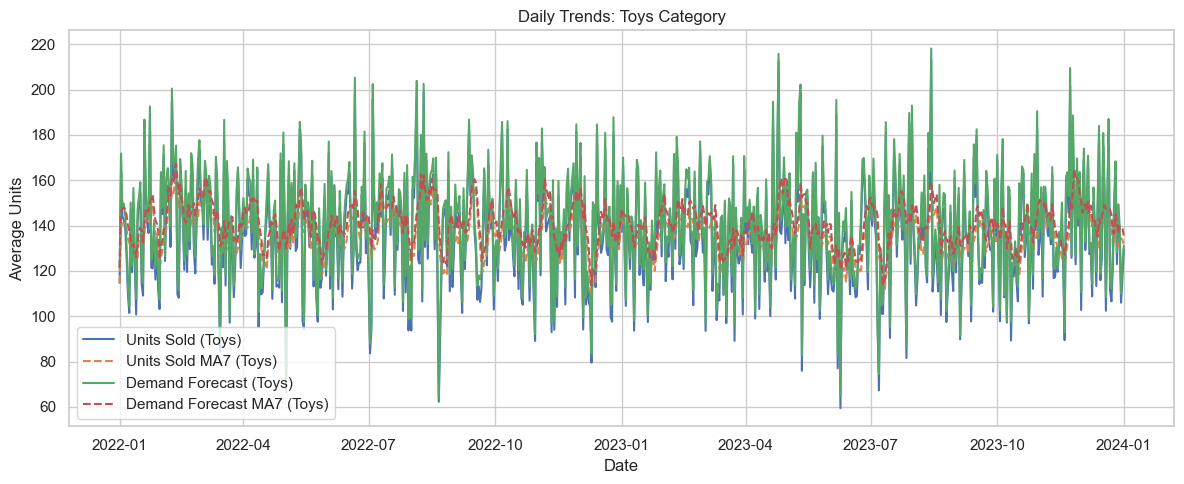

In [18]:
import matplotlib.pyplot as plt

# Ensure datetime and sort
df["Date"] = pd.to_datetime(df["Date"])
daily_trends = daily_trends.sort_values("Date")
toys_trends = toys_trends.sort_values("Date")

# select daily_trends from dates within 1 month range
# start_date = "2023-01-01"
# end_date = "2023-01-31"
# daily_trends = daily_trends[
#     (daily_trends["Date"] >= start_date) & (daily_trends["Date"] <= end_date)
# ]

# toys_trends = toys_trends[
#     (toys_trends["Date"] >= start_date) & (toys_trends["Date"] <= end_date)
# ]

# Add 7-day moving averages
for _d in (daily_trends, toys_trends):
    _d["Units Sold MA7"] = _d["Units Sold"].rolling(window=7, min_periods=1).mean()
    _d["Demand Forecast MA7"] = (
        _d["Demand Forecast"].rolling(window=7, min_periods=1).mean()
    )

# 1) All categories
plt.figure(figsize=(12, 5))
plt.plot(daily_trends["Date"], daily_trends["Units Sold"], label="Units Sold")
plt.plot(
    daily_trends["Date"],
    daily_trends["Units Sold MA7"],
    label="Units Sold MA7",
    linestyle="--",
)
plt.plot(daily_trends["Date"], daily_trends["Demand Forecast"], label="Demand Forecast")
plt.plot(
    daily_trends["Date"],
    daily_trends["Demand Forecast MA7"],
    label="Demand Forecast MA7",
    linestyle="--",
)
plt.title("Daily Trends: All Categories")
plt.xlabel("Date")
plt.ylabel("Average Units")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 2) Toys only
plt.figure(figsize=(12, 5))
plt.plot(toys_trends["Date"], toys_trends["Units Sold"], label="Units Sold (Toys)")
plt.plot(
    toys_trends["Date"],
    toys_trends["Units Sold MA7"],
    label="Units Sold MA7 (Toys)",
    linestyle="--",
)
plt.plot(
    toys_trends["Date"], toys_trends["Demand Forecast"], label="Demand Forecast (Toys)"
)
plt.plot(
    toys_trends["Date"],
    toys_trends["Demand Forecast MA7"],
    label="Demand Forecast MA7 (Toys)",
    linestyle="--",
)
plt.title("Daily Trends: Toys Category")
plt.xlabel("Date")
plt.ylabel("Average Units")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The time series appears additive, as fluctuations in sales and demand maintain a relatively constant amplitude over time, suggesting that seasonal and trend components add to the baseline rather than scale with it.

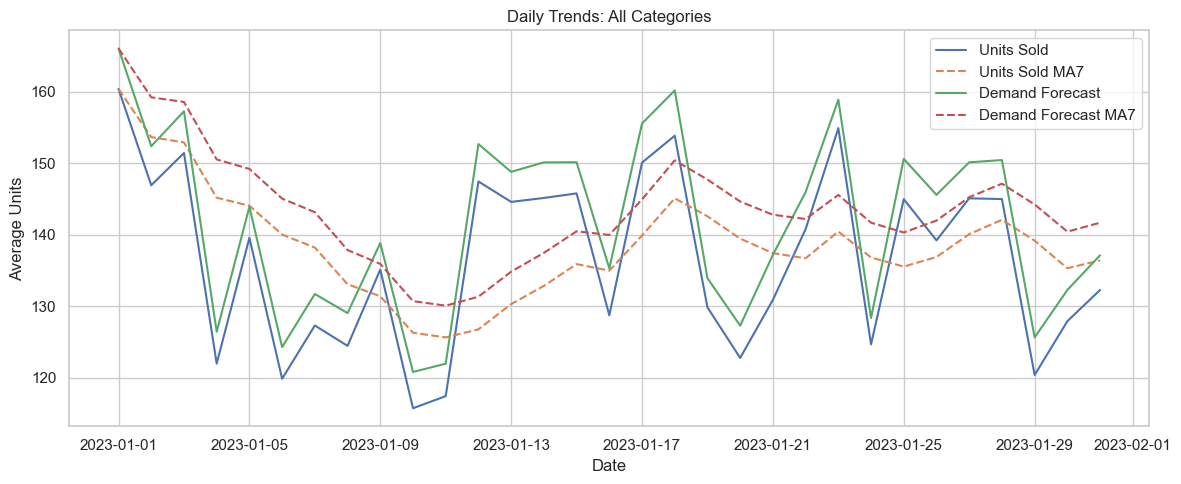

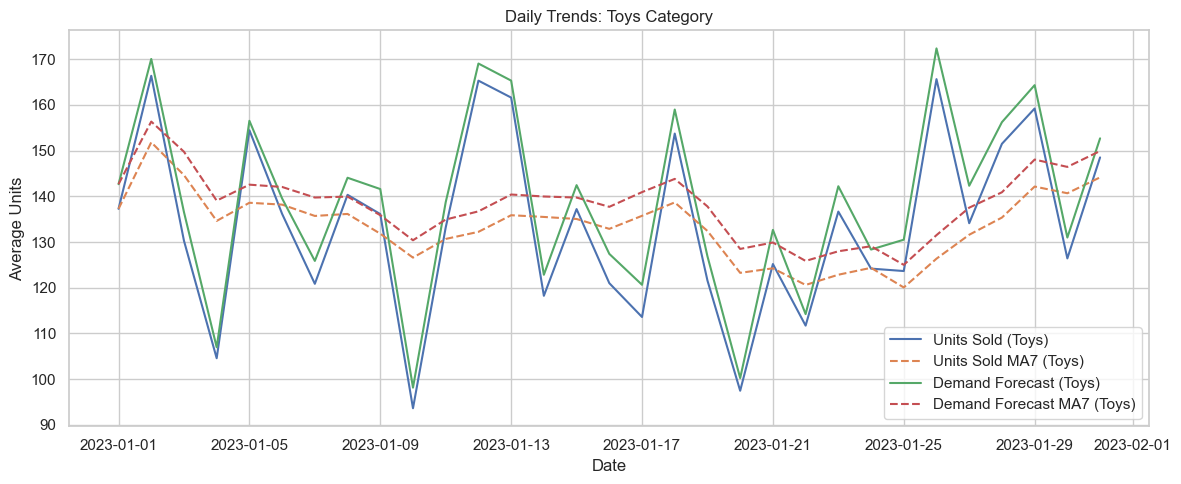

In [19]:
import matplotlib.pyplot as plt

# Ensure datetime and sort
df["Date"] = pd.to_datetime(df["Date"])
daily_trends = daily_trends.sort_values("Date")
toys_trends = toys_trends.sort_values("Date")

# select daily_trends from dates within 1 month range
start_date = "2023-01-01"
end_date = "2023-01-31"
daily_trends = daily_trends[
    (daily_trends["Date"] >= start_date) & (daily_trends["Date"] <= end_date)
]

toys_trends = toys_trends[
    (toys_trends["Date"] >= start_date) & (toys_trends["Date"] <= end_date)
]

# Add 7-day moving averages
for _d in (daily_trends, toys_trends):
    _d["Units Sold MA7"] = _d["Units Sold"].rolling(window=7, min_periods=1).mean()
    _d["Demand Forecast MA7"] = (
        _d["Demand Forecast"].rolling(window=7, min_periods=1).mean()
    )

# 1) All categories
plt.figure(figsize=(12, 5))
plt.plot(daily_trends["Date"], daily_trends["Units Sold"], label="Units Sold")
plt.plot(
    daily_trends["Date"],
    daily_trends["Units Sold MA7"],
    label="Units Sold MA7",
    linestyle="--",
)
plt.plot(daily_trends["Date"], daily_trends["Demand Forecast"], label="Demand Forecast")
plt.plot(
    daily_trends["Date"],
    daily_trends["Demand Forecast MA7"],
    label="Demand Forecast MA7",
    linestyle="--",
)
plt.title("Daily Trends: All Categories")
plt.xlabel("Date")
plt.ylabel("Average Units")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 2) Toys only
plt.figure(figsize=(12, 5))
plt.plot(toys_trends["Date"], toys_trends["Units Sold"], label="Units Sold (Toys)")
plt.plot(
    toys_trends["Date"],
    toys_trends["Units Sold MA7"],
    label="Units Sold MA7 (Toys)",
    linestyle="--",
)
plt.plot(
    toys_trends["Date"], toys_trends["Demand Forecast"], label="Demand Forecast (Toys)"
)
plt.plot(
    toys_trends["Date"],
    toys_trends["Demand Forecast MA7"],
    label="Demand Forecast MA7 (Toys)",
    linestyle="--",
)
plt.title("Daily Trends: Toys Category")
plt.xlabel("Date")
plt.ylabel("Average Units")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Deseasonalizing

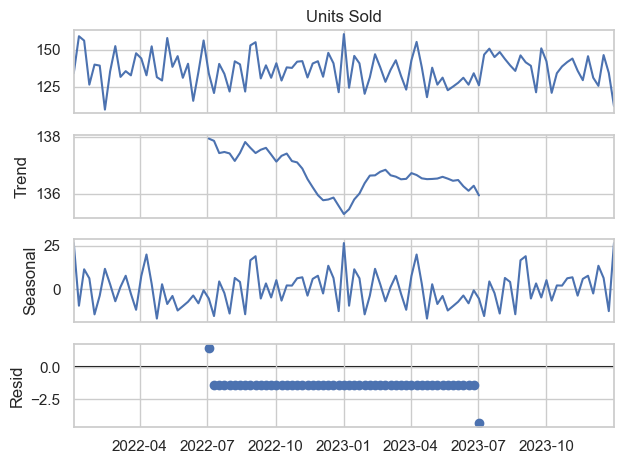

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import pandas as pd

# Example: use 'Units Sold' time series
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date")

# Aggregate daily data to weekly (if needed)
weekly = df.groupby("Date")["Units Sold"].mean().asfreq("W")

# Decompose the time series (additive model)
decomp = seasonal_decompose(weekly, model="additive")

# Plot trend, seasonal, and residual components
decomp.plot()
plt.show()

# Deseasonalized series = original - seasonal component
weekly_deseasonalized = weekly - decomp.seasonal

## Prediction

In [26]:
# 1) Prepare daily series
import pandas as pd
import numpy as np

df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date")

daily = (
    df.groupby("Date")[["Units Sold", "Demand Forecast", "Holiday/Promotion"]]
    .mean()
    .sort_index()
)

# 2) Make target = next week's demand (7-day ahead)
daily["y_next_week"] = daily["Demand Forecast"].shift(-7)

# 3) Create simple features from past sales and promos
daily["lag7_sales"] = daily["Units Sold"].shift(7)
daily["ma7_sales"] = daily["Units Sold"].rolling(7).mean()
daily["ma14_sales"] = daily["Units Sold"].rolling(14).mean()
daily["promo_ma7"] = daily["Holiday/Promotion"].rolling(7).mean()

# Calendar features
daily["dow"] = daily.index.dayofweek  # 0=Mon
daily["month"] = daily.index.month

# Drop rows with NaNs created by lag/rolling/shift
data = daily.dropna().copy()

features = ["lag7_sales", "ma7_sales", "ma14_sales", "promo_ma7", "dow", "month"]
X = data[features]
y = data["y_next_week"]

In [27]:
# 4) Time-based split: last 90 days as test
split_date = data.index.max() - pd.Timedelta(days=90)
X_train, X_test = X.loc[X.index <= split_date], X.loc[X.index > split_date]
y_train, y_test = y.loc[y.index <= split_date], y.loc[y.index > split_date]

X_train.shape, X_test.shape

((621, 6), (90, 6))

In [28]:
# 5) Train a model (Ridge regression in a pipeline)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error

pipe = Pipeline(
    [
        ("scaler", StandardScaler(with_mean=True, with_std=True)),
        ("model", Ridge(alpha=1.0, random_state=42)),
    ]
)

pipe.fit(X_train, y_train)

# Evaluate
y_pred = pipe.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"R²: {r2:.3f}  |  MAE: {mae:.2f}  |  MAPE: {mape:.2f}%")

R²: -0.008  |  MAE: 7.90  |  MAPE: 5.56%


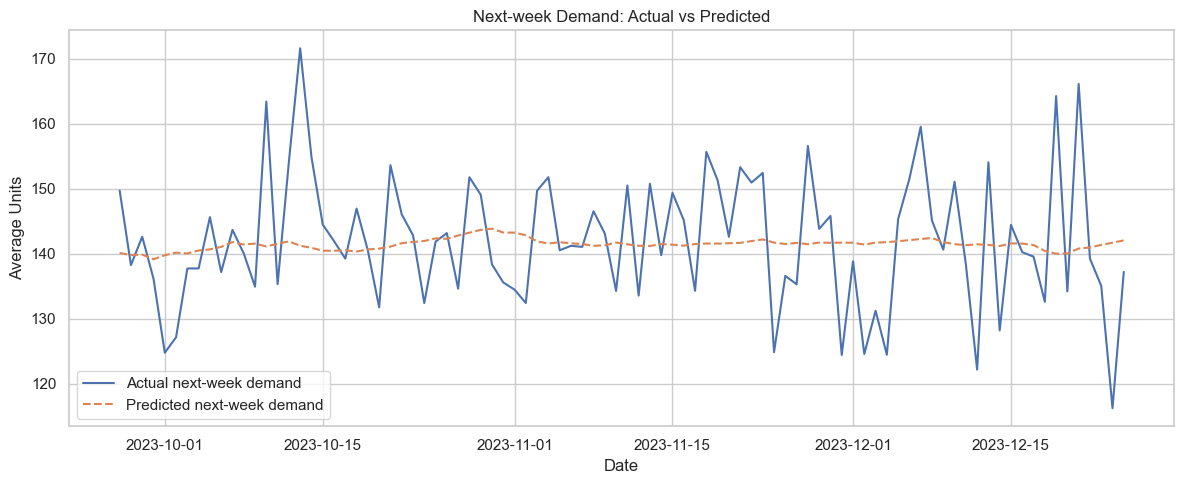

In [29]:
# 6) Plot actual vs predicted for the test window
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(y_test.index, y_test, label="Actual next-week demand")
plt.plot(y_test.index, y_pred, label="Predicted next-week demand", linestyle="--")
plt.title("Next-week Demand: Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("Average Units")
plt.legend()
plt.tight_layout()
plt.show()

In [30]:
# 7) Make a single prediction for the most recent available week ahead
# Use the latest row with full features
latest_row = data.iloc[[-1]][features]  # last row as DataFrame
next_week_pred = pipe.predict(latest_row)[0]
print(
    f"Predicted demand for the next week after {data.index[-1].date()}: {next_week_pred:.2f} units"
)

Predicted demand for the next week after 2023-12-25: 142.07 units


In [31]:
%pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
